# **云南大学软件学院 机器学习（实验-1）**

## **线性基函数回归**

姓名：陈俊宏

学号：20211060245

### **test1_1_GetSamples.py**

　　通过numpy库定义get_sample函数生成训练数据和测试数据，并将生成的数据填入0矩阵中，0维表示样本特征，1维表示样本标签，并将生成的数据写入字典，存储在`test1_data.json`文件中。

In [ ]:
import numpy as np
import json


# 生成训练数据和测试数据
def get_sample(n):
    x = np.random.uniform(-n, n)
    gaussian_noise = np.random.normal(0, 0.5)
    y = 2 * (np.sin(0.5 * x)) + gaussian_noise

    return x, y


# 声明六个零矩阵
S = np.zeros(shape=[2, 10], dtype=float)
M = np.zeros(shape=[2, 30], dtype=float)
L = np.zeros(shape=[2, 60], dtype=float)
T_S = np.zeros(shape=[2, 20], dtype=float)
T_M = np.zeros(shape=[2, 40], dtype=float)
T_L = np.zeros(shape=[2, 80], dtype=float)

# 将生成的数据填入矩阵，其中0维表示样本特征，1维表示标签
for i in range(60):
    x, y = get_sample(5)
    if i < 10:
        S[0][i] = x
        S[1][i] = y
    if i < 30:
        M[0][i] = x
        M[1][i] = y
    L[0][i] = x
    L[1][i] = y

for i in range(80):
    x, y = get_sample(10)
    if i < 20:
        T_S[0][i] = x
        T_S[1][i] = y
    if i < 40:
        T_M[0][i] = x
        T_M[1][i] = y
    T_L[0][i] = x
    T_L[1][i] = y

# 将矩阵写入字典，存储成json格式
data = {
    'train': {
        'S': S.tolist(),
        'M': M.tolist(),
        'L': L.tolist(),
    },
    'test': {
        'T_S': T_S.tolist(),
        'T_M': T_M.tolist(),
        'T_L': T_L.tolist(),
    }
}

with open('test1_data.json', 'w', encoding='utf-8') as fp:
    json.dump(data, fp, indent=1)


### **test1_1_Draw.py**

　　读取`test1_data.json`文件，并使用`matplotlib`对数据进行绘图，并保存为`test1_1.png`

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json

# 加载数据集
with open('test1_data.json', 'r', encoding='utf-8') as fp:
    data = json.load(fp)
    # fig画布；axes子图区域
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    # 限定坐标轴范围
    axes[0].set(title='S', ylim=(-4, 4), xlim=(-10, 10))
    axes[1].set(title='M', ylim=(-4, 4), xlim=(-10, 10))
    axes[2].set(title='L', ylim=(-4, 4), xlim=(-10, 10))
    # 绘制sin图像
    sin_x = np.linspace(-10, 10, num=256)
    sin_y = 2 * (np.sin(0.5 * sin_x))
    axes[0].plot(sin_x, sin_y, c='DEEPSKYBLUE', label='sin_curve')
    axes[1].plot(sin_x, sin_y, c='DEEPSKYBLUE', label='sin_curve')
    axes[2].plot(sin_x, sin_y, c='DEEPSKYBLUE', label='sin_curve')
    # 绘制训练数据集散点
    axes[0].scatter(data['train']['S'][0], data['train']['S'][1], c='BLACK', marker='+', label='train_samples')
    axes[1].scatter(data['train']['M'][0], data['train']['M'][1], c='BLACK', marker='+', label='train_samples')
    axes[2].scatter(data['train']['L'][0], data['train']['L'][1], c='BLACK', marker='+', label='train_samples')
    # 绘制测试数据集散点
    axes[0].scatter(data['test']['T_S'][0], data['test']['T_S'][1], c='RED', marker='.', label='test_samples')
    axes[1].scatter(data['test']['T_M'][0], data['test']['T_M'][1], c='RED', marker='.', label='test_samples')
    axes[2].scatter(data['test']['T_L'][0], data['test']['T_L'][1], c='RED', marker='.', label='test_samples')
    # 绘制图例
    axes[0].legend(loc='upper right', fontsize='x-small')
    axes[1].legend(loc='upper right', fontsize='x-small')
    axes[2].legend(loc='upper right', fontsize='x-small')
    # 保存图像
    plt.savefig('./test1_1.png')
    # 展示图像
    plt.show()


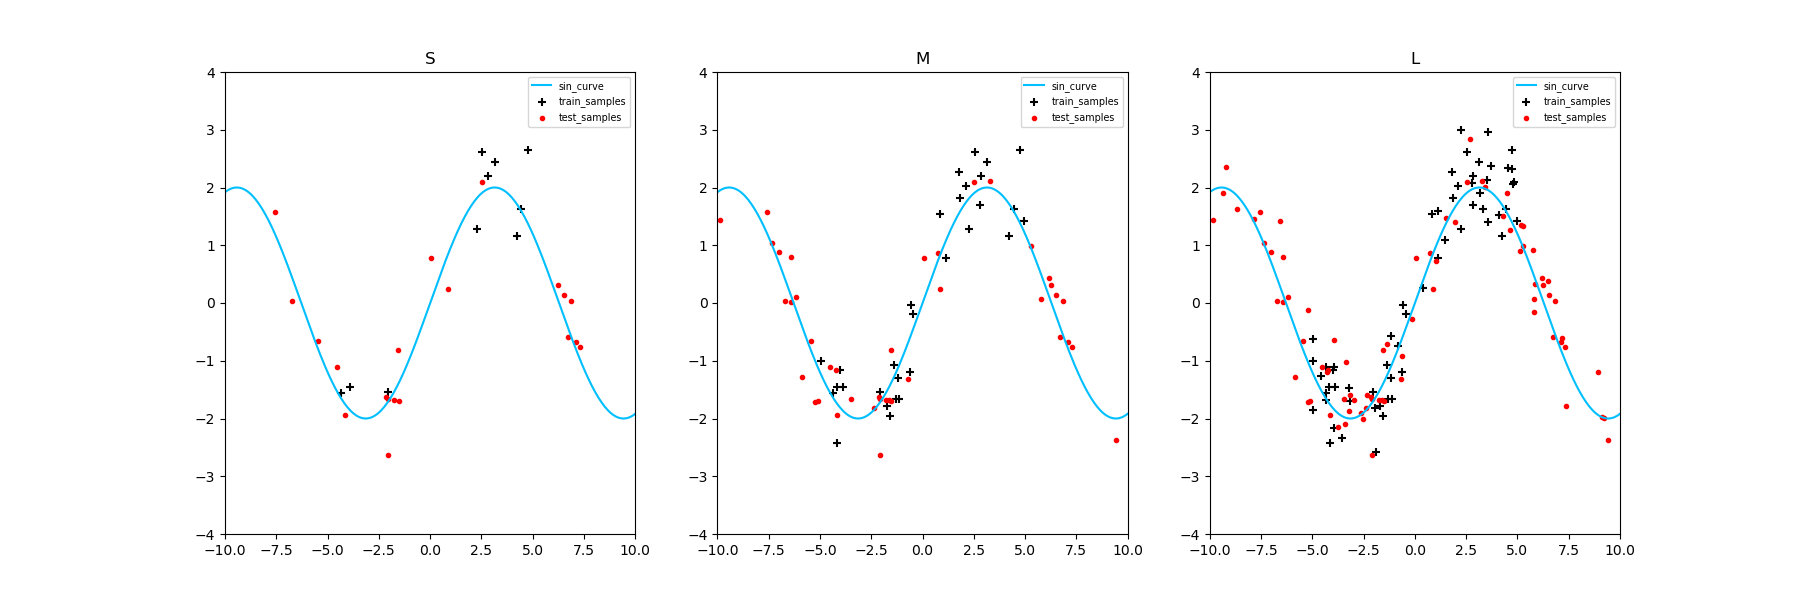

<center>test1_1.png</center>

### **test1_2_Model.py**

　　定义基函数模型`BasicFunc`和基函数回归模型`BasicRegression`，其中基函数回归模型基于极大似然估计原理，并从`test1_data.json`中读取已经生成的数据，并将其作为基函数模型的训练集和测试集进行基函数回归模型的训练，最后利用`matplotlib`模块将训练后的模型曲线以及`RMSE`绘制在`test1_3.png`中。

In [ ]:
import numpy as np
import math
import json
import matplotlib.pyplot as plt


# 定义基函数模型
class BasicFunc:
    def __init__(self, k: int):
        self.K = k
        self.basic_result = None

    def get_result(self, x: list):
        self.basic_result = np.zeros(shape=(1, self.K))
        for index, i in enumerate(x):
            basic_vector = np.zeros(shape=(1, self.K))
            for j in range(self.K):
                basic_vector[0][j] = pow(i, j)
            if index == 0:
                self.basic_result[0] = basic_vector
            else:
                self.basic_result = np.vstack((self.basic_result, basic_vector))

        return self.basic_result


# 定义基函数回归模型
class BasicRegression:
    def __init__(self, k):
        self.w = None
        self.basic_model = BasicFunc(k)

    # 利用已推导出的极大似然估计训练模型
    def fit(self, x_train, y_train):
        design_matrix = self.basic_model.get_result(x_train)
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(design_matrix.T, design_matrix)), design_matrix.T), y_train)

    # 利用已经训练好的模型进行预测，并返回预测值和RMSE
    def predict(self, x_test: list, y_test=False):
        y_hat = np.dot(self.basic_model.get_result(x_test), self.w)
        if y_test:
            b = []
            for i in range(len(y_test)):
                b.append(np.array(y_test[i]))
            y_array = np.array(b)
            RMSE = math.sqrt(np.sum(pow((y_array - y_hat), 2)) / len(x_test))
            return y_hat, RMSE
        else:
            return y_hat


with open('test1_data.json', 'r', encoding='utf-8') as fp:
    # fig画布；axes子图区域
    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    # 限定坐标轴范围
    axes[0][1].set(title='K=2 M RMSE=', ylim=(-4, 4), xlim=(-10, 10))
    axes[0][2].set(title='K=2 L RMSE=', ylim=(-4, 4), xlim=(-10, 10))
    axes[1][0].set(title='K=4 S RMSE=', ylim=(-4, 4), xlim=(-10, 10))
    axes[1][1].set(title='K=4 M RMSE=', ylim=(-4, 4), xlim=(-10, 10))
    axes[1][2].set(title='K=4 L RMSE=', ylim=(-4, 4), xlim=(-10, 10))
    axes[2][0].set(title='K=8 S RMSE=', ylim=(-4, 4), xlim=(-10, 10))
    axes[2][1].set(title='K=8 M RMSE=', ylim=(-4, 4), xlim=(-10, 10))
    axes[2][2].set(title='K=8 L RMSE=', ylim=(-4, 4), xlim=(-10, 10))
    # 绘制sin图像
    sin_x = np.linspace(-10, 10, num=256)
    sin_y = 2 * (np.sin(0.5 * sin_x))
    axes[0][0].plot(sin_x, sin_y, c='DARKGREEN', label='sin_curve')
    axes[0][1].plot(sin_x, sin_y, c='DARKGREEN', label='sin_curve')
    axes[0][2].plot(sin_x, sin_y, c='DARKGREEN', label='sin_curve')
    axes[1][0].plot(sin_x, sin_y, c='DARKGREEN', label='sin_curve')
    axes[1][1].plot(sin_x, sin_y, c='DARKGREEN', label='sin_curve')
    axes[1][2].plot(sin_x, sin_y, c='DARKGREEN', label='sin_curve')
    axes[2][0].plot(sin_x, sin_y, c='DARKGREEN', label='sin_curve')
    axes[2][1].plot(sin_x, sin_y, c='DARKGREEN', label='sin_curve')
    axes[2][2].plot(sin_x, sin_y, c='DARKGREEN', label='sin_curve')

    # 加载数据
    data = json.load(fp)

    # S K=2
    BasicRegression_k2 = BasicRegression(2)
    BasicRegression_k2.fit(data["train"]["S"][0], data["train"]["S"][1])
    y_hat, RMSE = BasicRegression_k2.predict(data["test"]["T_S"][0], data["test"]["T_S"][1])
    temp_x = np.linspace(-10, 10, num=256).tolist()
    temp_y = BasicRegression_k2.predict(temp_x)
    axes[0][0].set(title=F'K=2    S    RMSE={RMSE}', ylim=(-4, 4), xlim=(-10, 10))
    axes[0][0].plot(temp_x, temp_y, c='BLUE', label='PolynomialRegression_curve')
    axes[0][0].scatter(data['train']['S'][0], data['train']['S'][1], c='BLACK', marker='+', label='train_samples')
    axes[0][0].scatter(data['test']['T_S'][0], data['test']['T_S'][1], c='RED', marker='.', label='test_samples')
    # M K=2
    BasicRegression_k2.fit(data["train"]["M"][0], data["train"]["M"][1])
    y_hat, RMSE = BasicRegression_k2.predict(data["test"]["T_M"][0], data["test"]["T_M"][1])
    temp_x = np.linspace(-10, 10, num=256).tolist()
    temp_y = BasicRegression_k2.predict(temp_x)
    axes[0][1].set(title=F'K=2    M    RMSE={RMSE}', ylim=(-4, 4), xlim=(-10, 10))
    axes[0][1].plot(temp_x, temp_y, c='BLUE', label='PolynomialRegression_curve')
    axes[0][1].scatter(data['train']['M'][0], data['train']['M'][1], c='BLACK', marker='+', label='train_samples')
    axes[0][1].scatter(data['test']['T_M'][0], data['test']['T_M'][1], c='RED', marker='.', label='test_samples')
    # L K=2
    BasicRegression_k2.fit(data["train"]["L"][0], data["train"]["L"][1])
    y_hat, RMSE = BasicRegression_k2.predict(data["test"]["T_L"][0], data["test"]["T_L"][1])
    temp_x = np.linspace(-10, 10, num=256).tolist()
    temp_y = BasicRegression_k2.predict(temp_x)
    axes[0][2].set(title=F'K=2    L    RMSE={RMSE}', ylim=(-4, 4), xlim=(-10, 10))
    axes[0][2].plot(temp_x, temp_y, c='BLUE', label='PolynomialRegression_curve')
    axes[0][2].scatter(data['train']['L'][0], data['train']['L'][1], c='BLACK', marker='+', label='train_samples')
    axes[0][2].scatter(data['test']['T_L'][0], data['test']['T_L'][1], c='RED', marker='.', label='test_samples')

    # S K=4
    BasicRegression_k2 = BasicRegression(4)
    BasicRegression_k2.fit(data["train"]["S"][0], data["train"]["S"][1])
    y_hat, RMSE = BasicRegression_k2.predict(data["test"]["T_S"][0], data["test"]["T_S"][1])
    temp_x = np.linspace(-10, 10, num=256).tolist()
    temp_y = BasicRegression_k2.predict(temp_x)
    axes[1][0].set(title=F'K=4    S    RMSE={RMSE}', ylim=(-4, 4), xlim=(-10, 10))
    axes[1][0].plot(temp_x, temp_y, c='BLUE', label='PolynomialRegression_curve')
    axes[1][0].scatter(data['train']['S'][0], data['train']['S'][1], c='BLACK', marker='+', label='train_samples')
    axes[1][0].scatter(data['test']['T_S'][0], data['test']['T_S'][1], c='RED', marker='.', label='test_samples')
    # M K=4
    BasicRegression_k2.fit(data["train"]["M"][0], data["train"]["M"][1])
    y_hat, RMSE = BasicRegression_k2.predict(data["test"]["T_M"][0], data["test"]["T_M"][1])
    temp_x = np.linspace(-10, 10, num=256).tolist()
    temp_y = BasicRegression_k2.predict(temp_x)
    axes[1][1].set(title=F'K=4    M    RMSE={RMSE}', ylim=(-4, 4), xlim=(-10, 10))
    axes[1][1].plot(temp_x, temp_y, c='BLUE', label='PolynomialRegression_curve')
    axes[1][1].scatter(data['train']['M'][0], data['train']['M'][1], c='BLACK', marker='+', label='train_samples')
    axes[1][1].scatter(data['test']['T_M'][0], data['test']['T_M'][1], c='RED', marker='.', label='test_samples')
    # L K=4
    BasicRegression_k2.fit(data["train"]["L"][0], data["train"]["L"][1])
    y_hat, RMSE = BasicRegression_k2.predict(data["test"]["T_L"][0], data["test"]["T_L"][1])
    temp_x = np.linspace(-10, 10, num=256).tolist()
    temp_y = BasicRegression_k2.predict(temp_x)
    axes[1][2].set(title=F'K=4    L    RMSE={RMSE}', ylim=(-4, 4), xlim=(-10, 10))
    axes[1][2].plot(temp_x, temp_y, c='BLUE', label='PolynomialRegression_curve')
    axes[1][2].scatter(data['train']['L'][0], data['train']['L'][1], c='BLACK', marker='+', label='train_samples')
    axes[1][2].scatter(data['test']['T_L'][0], data['test']['T_L'][1], c='RED', marker='.', label='test_samples')

    # S K=8
    BasicRegression_k2 = BasicRegression(8)
    BasicRegression_k2.fit(data["train"]["S"][0], data["train"]["S"][1])
    y_hat, RMSE = BasicRegression_k2.predict(data["test"]["T_S"][0], data["test"]["T_S"][1])
    temp_x = np.linspace(-10, 10, num=256).tolist()
    temp_y = BasicRegression_k2.predict(temp_x)
    axes[2][0].set(title=F'K=8    S    RMSE={RMSE}', ylim=(-4, 4), xlim=(-10, 10))
    axes[2][0].plot(temp_x, temp_y, c='BLUE', label='PolynomialRegression_curve')
    axes[2][0].scatter(data['train']['S'][0], data['train']['S'][1], c='BLACK', marker='+', label='train_samples')
    axes[2][0].scatter(data['test']['T_S'][0], data['test']['T_S'][1], c='RED', marker='.', label='test_samples')
    # M K=8
    BasicRegression_k2.fit(data["train"]["M"][0], data["train"]["M"][1])
    y_hat, RMSE = BasicRegression_k2.predict(data["test"]["T_M"][0], data["test"]["T_M"][1])
    temp_x = np.linspace(-10, 10, num=256).tolist()
    temp_y = BasicRegression_k2.predict(temp_x)
    axes[2][1].set(title=F'K=8    M    RMSE={RMSE}', ylim=(-4, 4), xlim=(-10, 10))
    axes[2][1].plot(temp_x, temp_y, c='BLUE', label='PolynomialRegression_curve')
    axes[2][1].scatter(data['train']['M'][0], data['train']['M'][1], c='BLACK', marker='+', label='train_samples')
    axes[2][1].scatter(data['test']['T_M'][0], data['test']['T_M'][1], c='RED', marker='.', label='test_samples')
    # L K=8
    BasicRegression_k2.fit(data["train"]["L"][0], data["train"]["L"][1])
    y_hat, RMSE = BasicRegression_k2.predict(data["test"]["T_L"][0], data["test"]["T_L"][1])
    temp_x = np.linspace(-10, 10, num=256).tolist()
    temp_y = BasicRegression_k2.predict(temp_x)
    axes[2][2].set(title=F'K=8    L    RMSE={RMSE}', ylim=(-4, 4), xlim=(-10, 10))
    axes[2][2].plot(temp_x, temp_y, c='BLUE', label='PolynomialRegression_curve')
    axes[2][2].scatter(data['train']['L'][0], data['train']['L'][1], c='BLACK', marker='+', label='train_samples')
    axes[2][2].scatter(data['test']['T_L'][0], data['test']['T_L'][1], c='RED', marker='.', label='test_samples')

    # 绘制图例
    axes[0][0].legend(loc='upper left', fontsize='x-small')
    axes[0][1].legend(loc='upper left', fontsize='x-small')
    axes[0][2].legend(loc='upper left', fontsize='x-small')
    axes[1][0].legend(loc='upper left', fontsize='x-small')
    axes[1][1].legend(loc='upper left', fontsize='x-small')
    axes[1][2].legend(loc='upper left', fontsize='x-small')
    axes[2][0].legend(loc='upper left', fontsize='x-small')
    axes[2][1].legend(loc='upper left', fontsize='x-small')
    axes[2][2].legend(loc='upper left', fontsize='x-small')
    # 保存图像
    plt.savefig('./test1_3.png')
    # 展示图像
    plt.show()


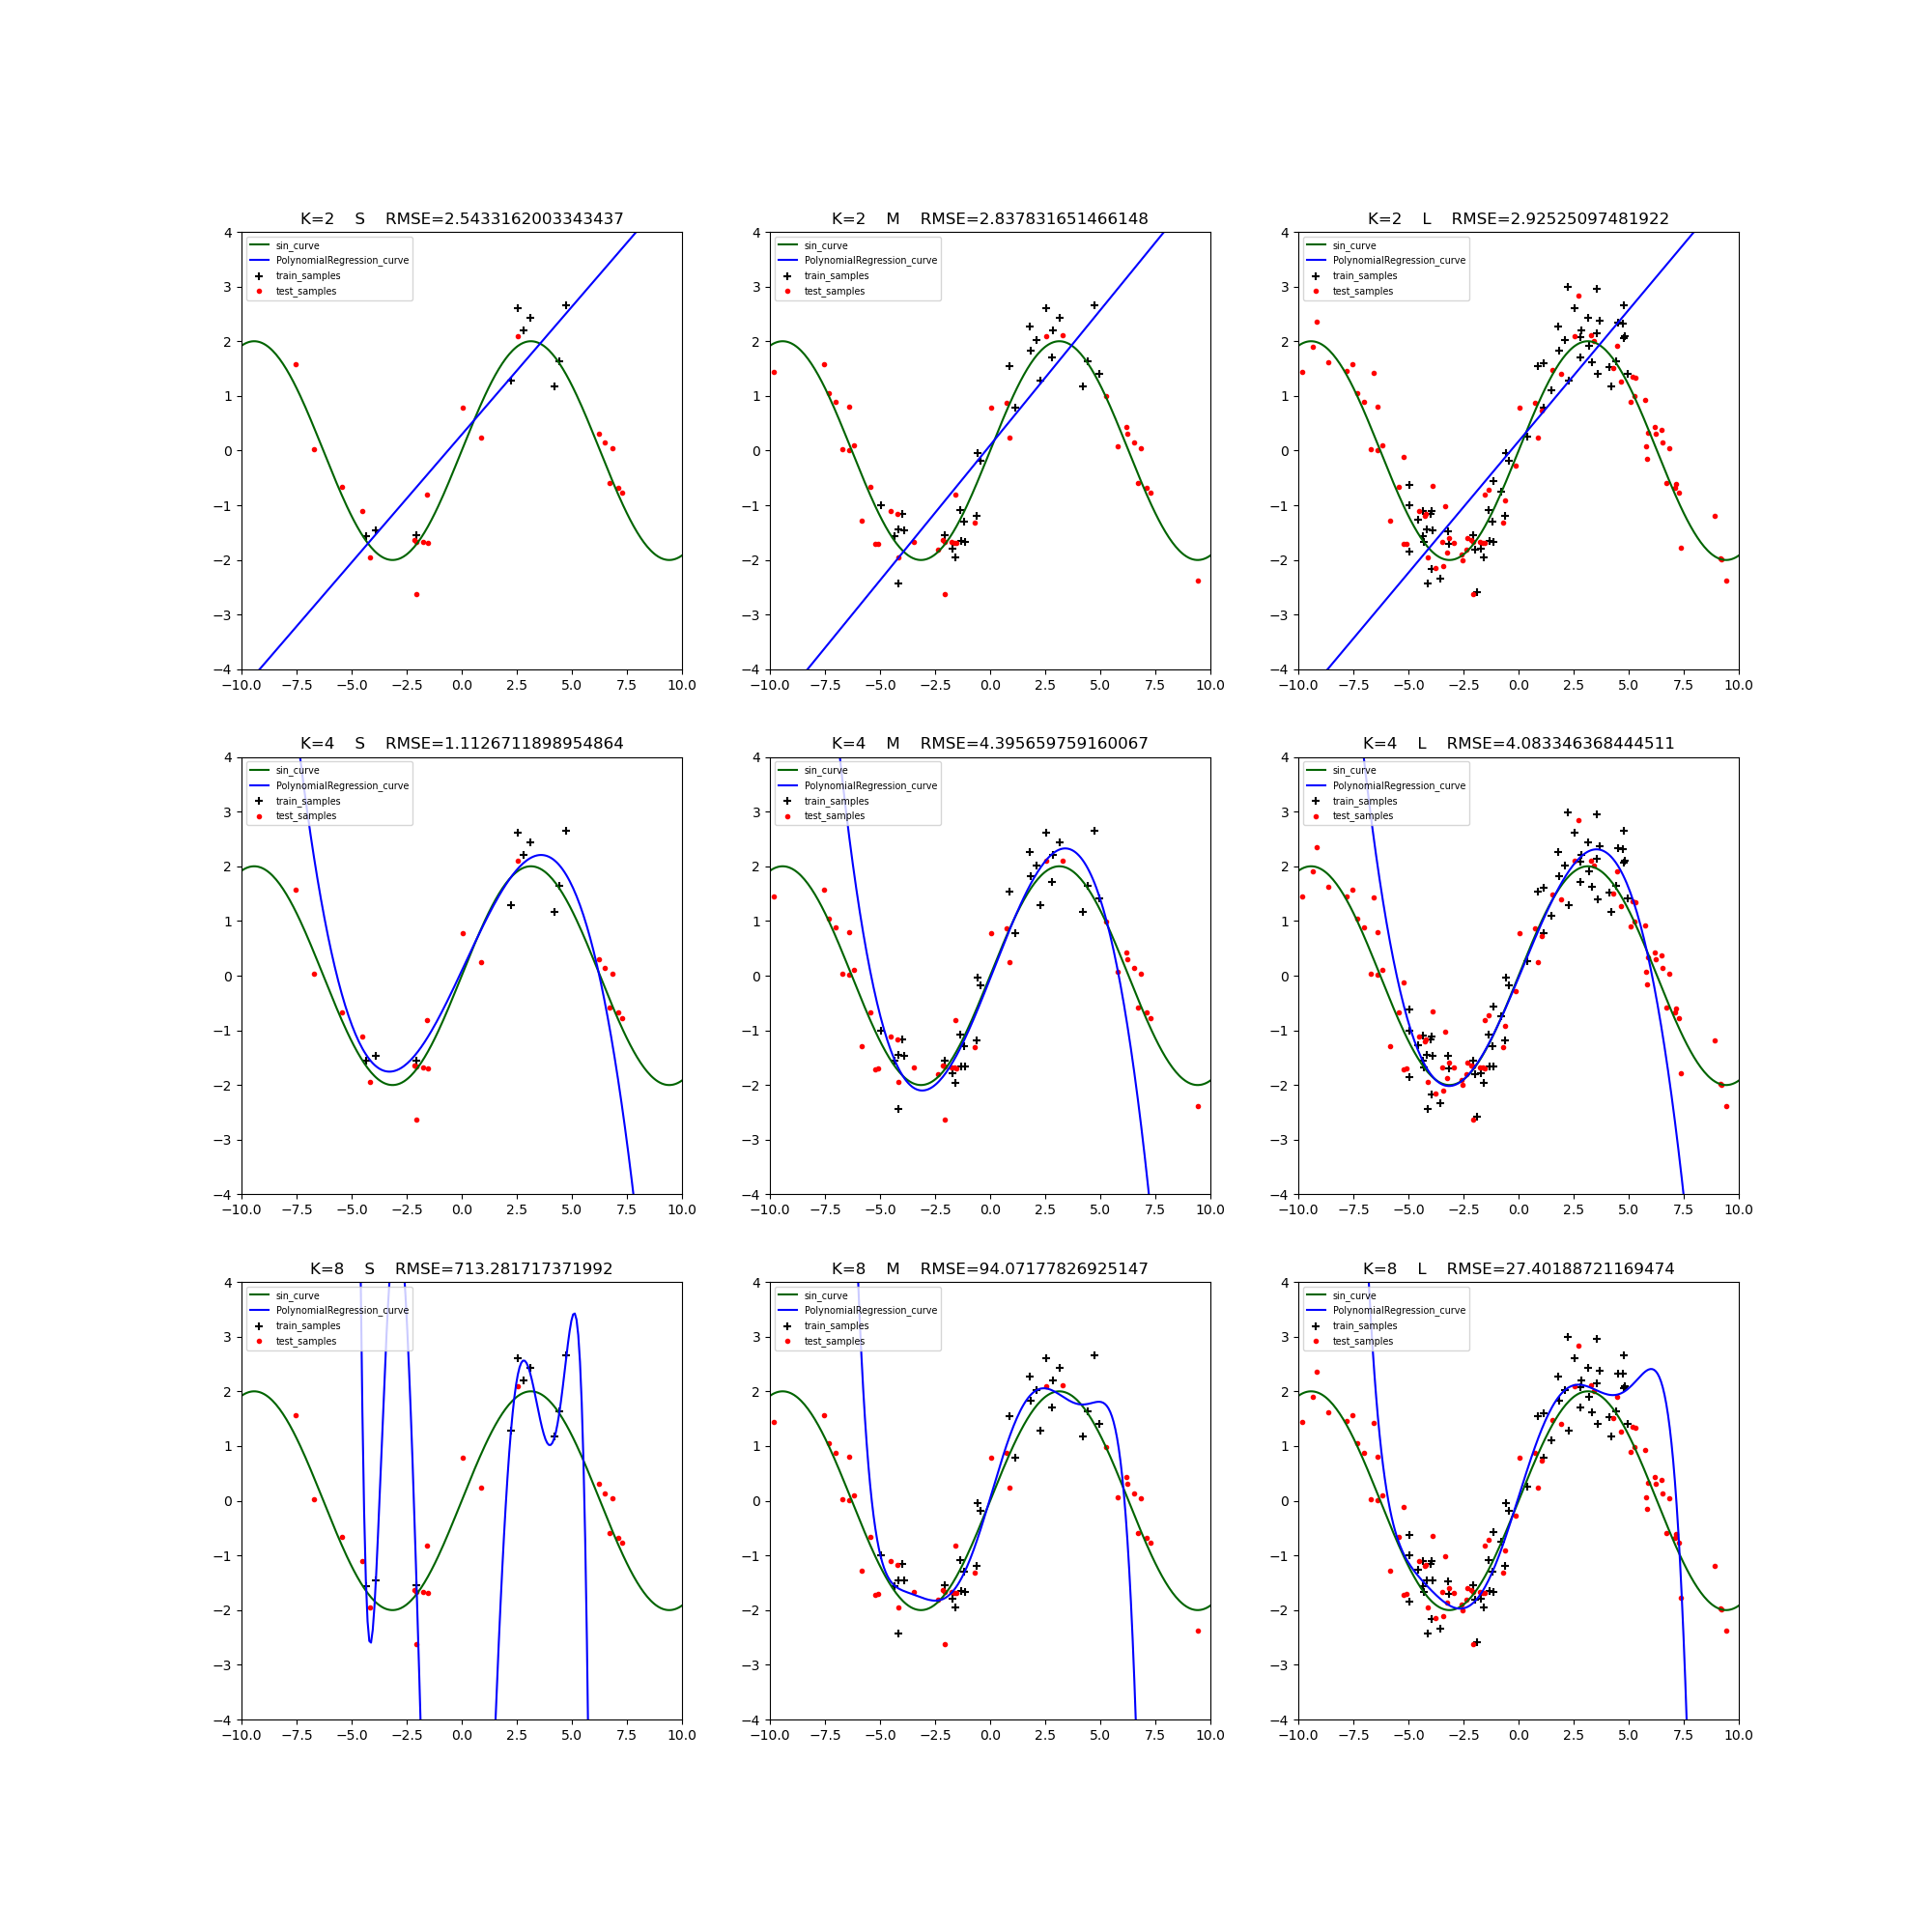

<center>test1_3.png</center>